In [1]:
import itertools

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats, special, integrate

 - https://en.wikipedia.org/wiki/Logit-normal_distribution
 - https://en.wikipedia.org/wiki/Logistic_function
 - https://en.wikipedia.org/wiki/Logit
 
 - https://github.com/scipy/scipy/blob/v1.8.1/scipy/stats/_continuous_distns.py#L5365-L5499
 
 - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.html?highlight=rv_continous
 - https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.expit.html
 - https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.logit.html
 
 - https://github.com/statsmodels/statsmodels/blob/main/statsmodels/sandbox/distributions/transformed.py#L55
 - https://github.com/scipy/scipy/issues/12133
 
 - https://stackoverflow.com/questions/60669256/how-do-you-create-a-logit-normal-distribution-in-python
 
![Example](https://upload.wikimedia.org/wikipedia/commons/a/ae/LogitnormDensityGrid.svg)
 

In [2]:
class logitnorm_gen(stats.rv_continuous):

    def _argcheck(self, m, s):
        return (s > 0.) & (s < np.inf) & (m > -np.inf) & (m < np.inf)
    
    def _pdf(self, x, m, s):
        return stats.norm(loc=m, scale=s).pdf(special.logit(x)) / (x * (1 - x))
    
    def _cdf(self, x, m, s):
        return stats.norm(loc=m, scale=s).cdf(special.logit(x))
    
    def _rvs(self, m, s, size=None, random_state=None):
        return special.expit(m + s * random_state.standard_normal(size))
    
    #def fit(self, data, **kwargs):
    #    return stats.norm.fit(special.logit(data), **kwargs)

logitnorm = logitnorm_gen(a=0.0, b=1.0, name="logitnorm")

In [3]:
law = logitnorm(m=2., s=0.5)

In [4]:
data = law.rvs(1000)

In [5]:
p = logitnorm.fit(data, floc=0., fscale=1.)
p

(1.995402021720513, 0.4927577442017804, 0.0, 1.0)

In [6]:
eps = 1e-12
x = np.linspace(0. + eps, 1. - eps, 1000)

In [7]:
y = law.pdf(x)

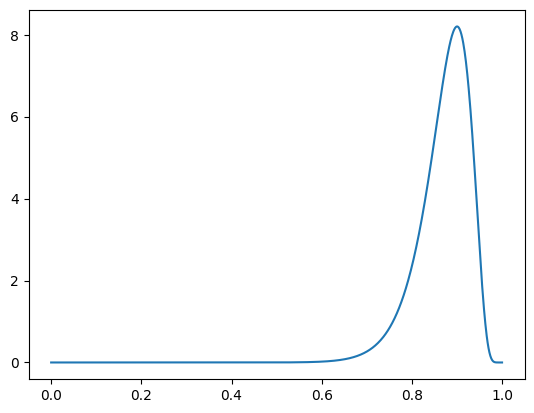

In [8]:
fig, axe = plt.subplots()
axe.plot(x, y)

In [9]:
integrate.quad(law.pdf, 0., 1.)

(0.9999999999999889, 3.264742454942071e-10)

In [10]:
def generate_fixtures(
    locs=[-2.0, -1.0, 0.0, 0.5, 1.0, 2.0],
    scales=[0.32, 0.56, 1.00, 1.78, 3.16],
    sizes=[10000], #sizes=[100, 1000, 10000],
    seeds=[789], #seeds=[789, 123456, 999999]
):
    for (loc, scale, size, seed) in itertools.product(locs, scales, sizes, seeds):
        yield {"parameters": {"loc": loc, "scale": scale}, "size": size, "random_state": seed}

/home/jlandercy/.local/lib/python3.10/site-packages/scipy/stats/_stats_py.py:8022: RuntimeWarning: divide by zero encountered in divide
  terms = (f_obs_float - f_exp)**2 / f_exp


{'loc': -2.0, 'scale': 0.32} {'size': 1000, 'random_state': 789}
Same: True
Area: 1.000000
Fit Parameters: (-1.9936305652605573, 0.3260203078199613, 0.0, 1.0)
KS Test: KstestResult(statistic=0.015425634521729459, pvalue=0.9682826535365906, statistic_location=0.07369720437503266, statistic_sign=1)
Chi2 Test: Power_divergenceResult(statistic=nan, pvalue=nan)
--------------------------------------------------------------------------------
{'loc': -2.0, 'scale': 0.56} {'size': 1000, 'random_state': 789}
Same: True
Area: 1.000000
Fit Parameters: (-1.988775352667501, 0.570528649600607, 0.0, 1.0)
KS Test: KstestResult(statistic=0.01544170096777027, pvalue=0.9679823824114853, statistic_location=0.050706518129028405, statistic_sign=1)
Chi2 Test: Power_divergenceResult(statistic=0.8365605508843661, pvalue=0.9910573520778433)
--------------------------------------------------------------------------------
{'loc': -2.0, 'scale': 1.0} {'size': 1000, 'random_state': 789}
Same: True
Area: 1.000000
Fi

{'loc': 0.5, 'scale': 1.78} {'size': 1000, 'random_state': 789}
Same: True
Area: 0.999983
Fit Parameters: (0.5355426981437925, 1.813505295445315, 0.0, 1.0)
KS Test: KstestResult(statistic=0.015430386653291057, pvalue=0.9681940302852196, statistic_location=0.0790735337698202, statistic_sign=1)
Chi2 Test: Power_divergenceResult(statistic=0.7484927284277718, pvalue=0.9933841457697907)
--------------------------------------------------------------------------------
{'loc': 0.5, 'scale': 3.16} {'size': 1000, 'random_state': 789}
Same: True
Area: 0.981915
Fit Parameters: (0.5631845111664086, 3.219466513765221, 0.0, 1.0)
KS Test: KstestResult(statistic=0.01543390652631036, pvalue=0.9681282842605367, statistic_location=0.008611921940160671, statistic_sign=1)
Chi2 Test: Power_divergenceResult(statistic=0.526213393009209, pvalue=0.9975047327595916)
--------------------------------------------------------------------------------
{'loc': 1.0, 'scale': 0.32} {'size': 1000, 'random_state': 789}
Same

/tmp/ipykernel_1174/3917337472.py:36: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axe = plt.subplots()


{'loc': 1.0, 'scale': 0.56} {'size': 1000, 'random_state': 789}
Same: True
Area: 1.000000
Fit Parameters: (1.0111838632409016, 0.5705301832977612, 0.0, 1.0)
KS Test: KstestResult(statistic=0.015433925879979618, pvalue=0.968127922519393, statistic_location=0.5175768693192224, statistic_sign=1)
Chi2 Test: Power_divergenceResult(statistic=0.8848959211218028, pvalue=0.989601896775245)
--------------------------------------------------------------------------------
{'loc': 1.0, 'scale': 1.0} {'size': 1000, 'random_state': 789}
Same: True
Area: 1.000000
Fit Parameters: (1.02001599126379, 1.0188017655513248, 0.0, 1.0)
KS Test: KstestResult(statistic=0.01543878381232032, pvalue=0.9680370383265762, statistic_location=0.3407141239998012, statistic_sign=1)
Chi2 Test: Power_divergenceResult(statistic=0.8418126359939049, pvalue=0.9909054015734413)
--------------------------------------------------------------------------------
{'loc': 1.0, 'scale': 1.78} {'size': 1000, 'random_state': 789}
Same: Tr

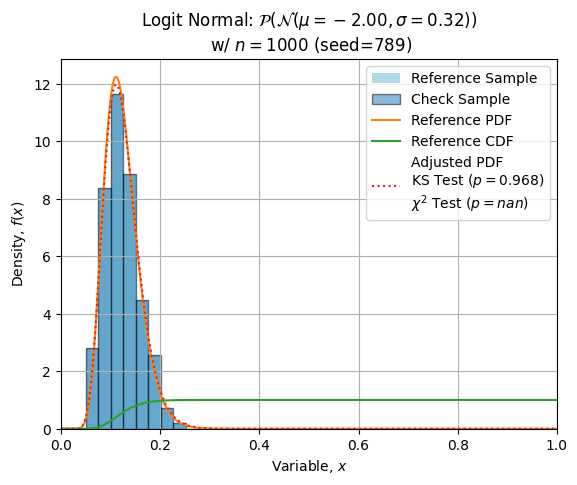

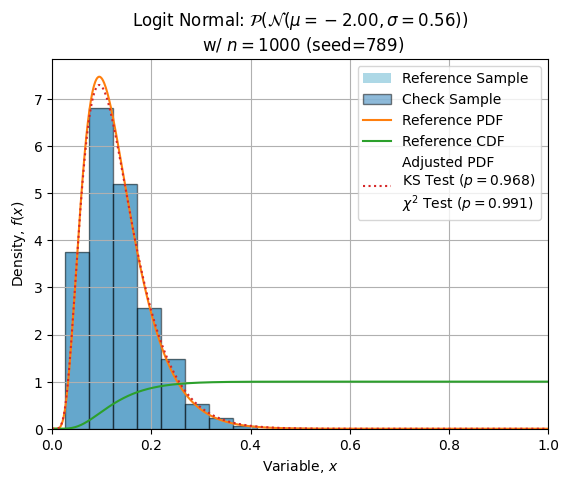

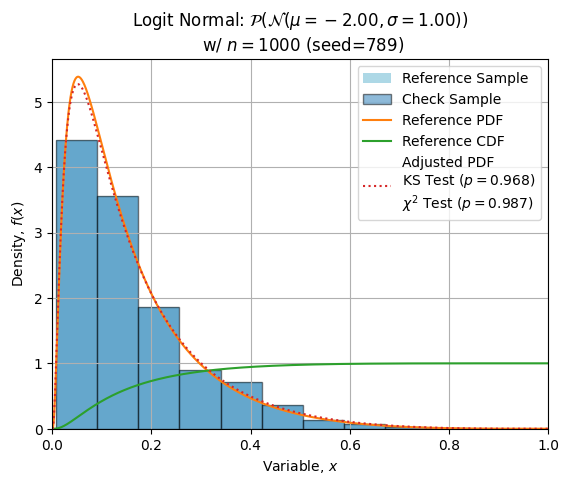

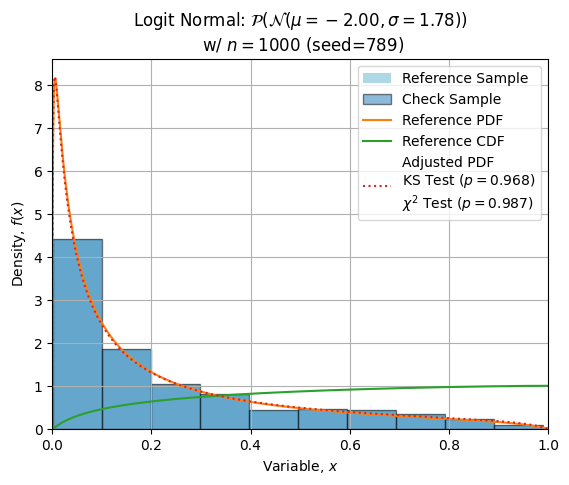

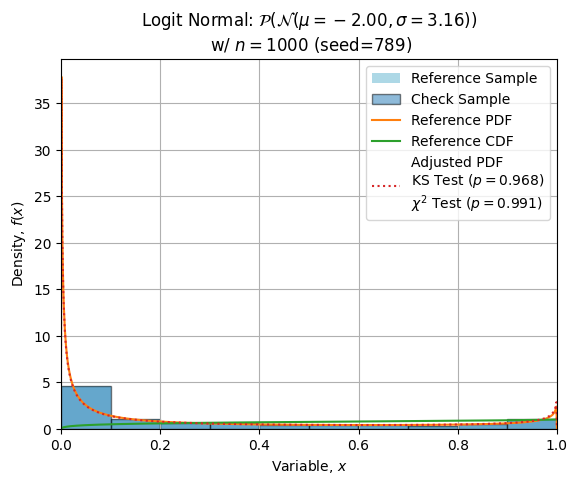

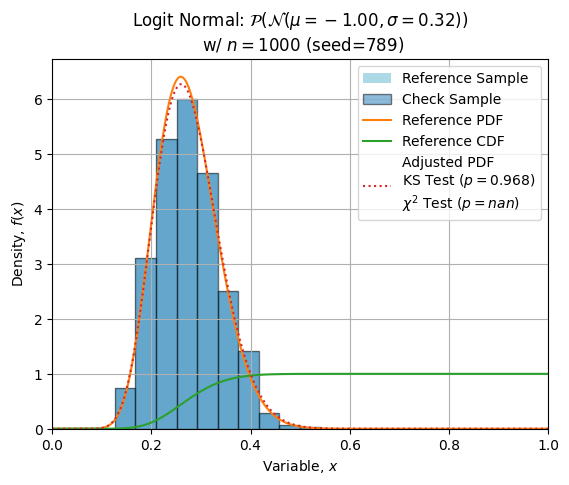

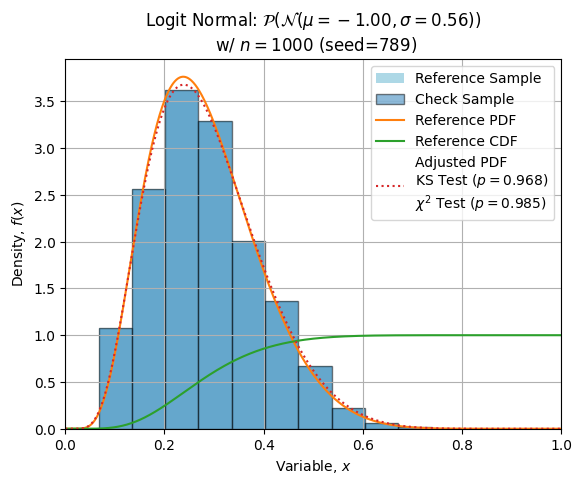

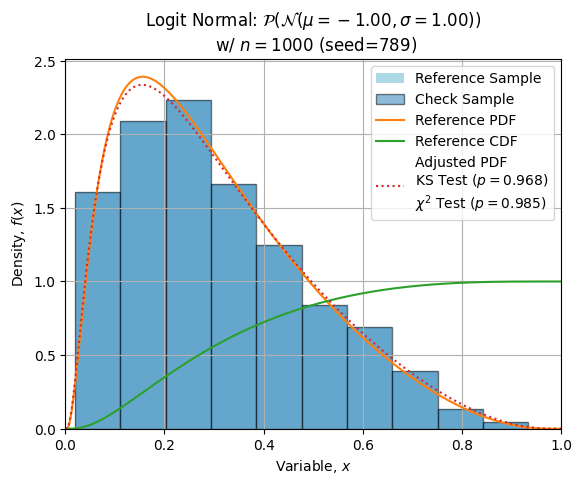

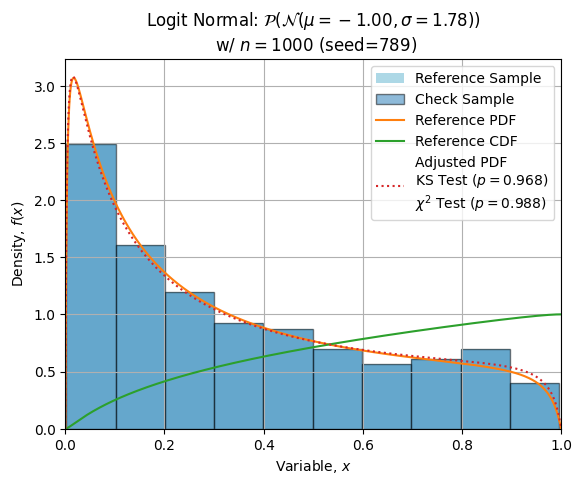

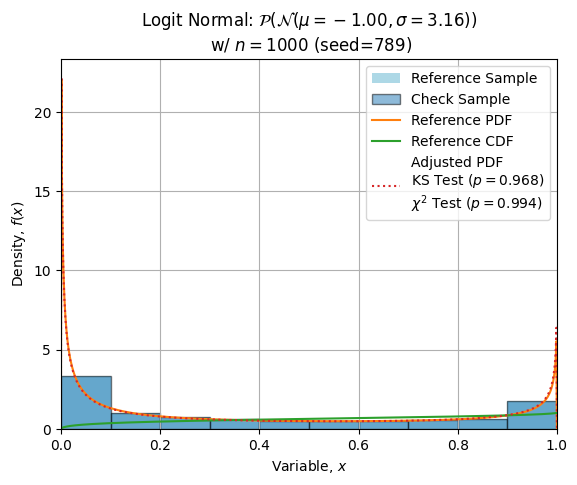

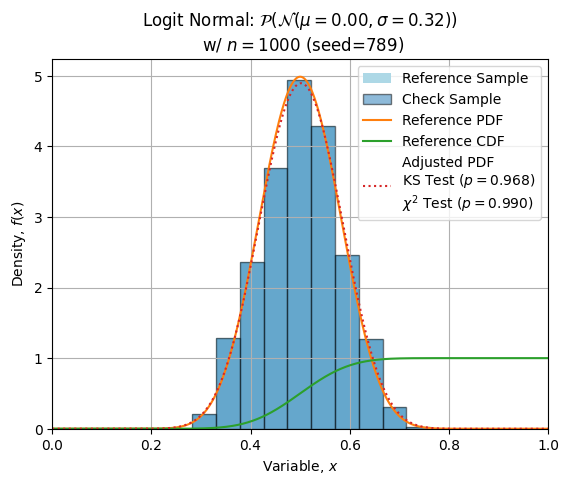

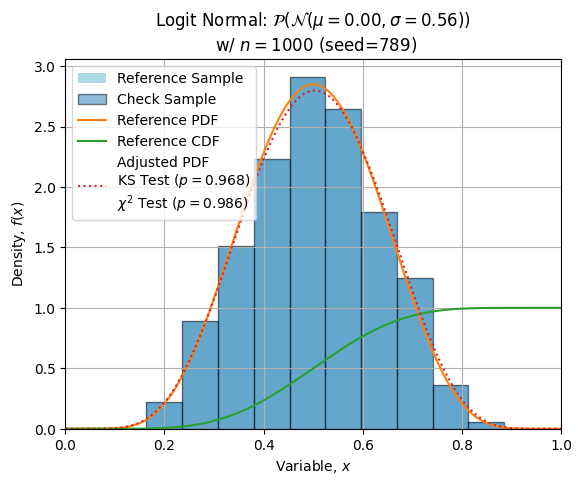

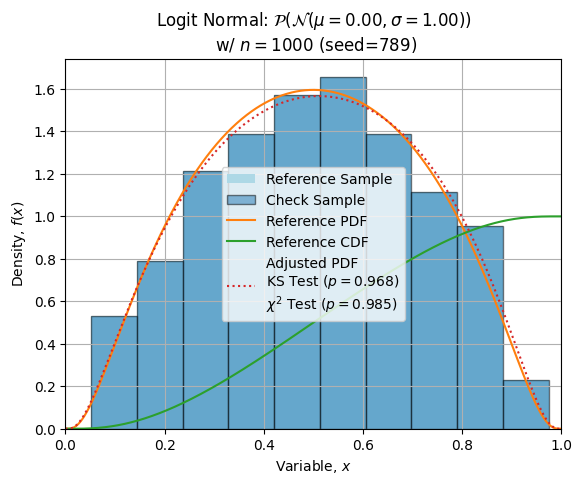

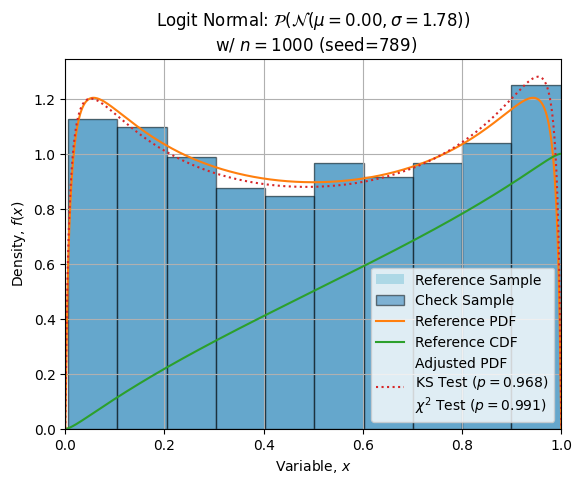

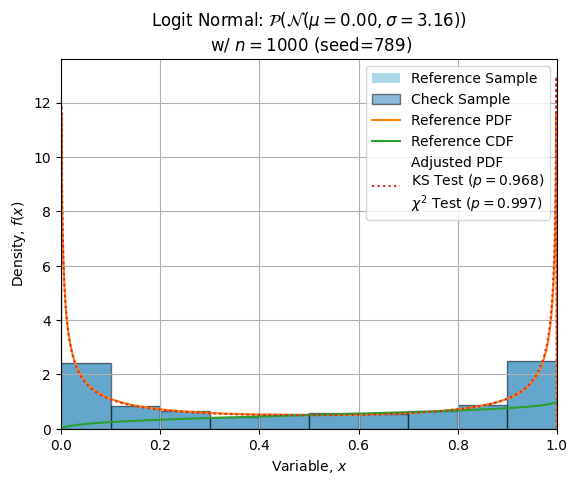

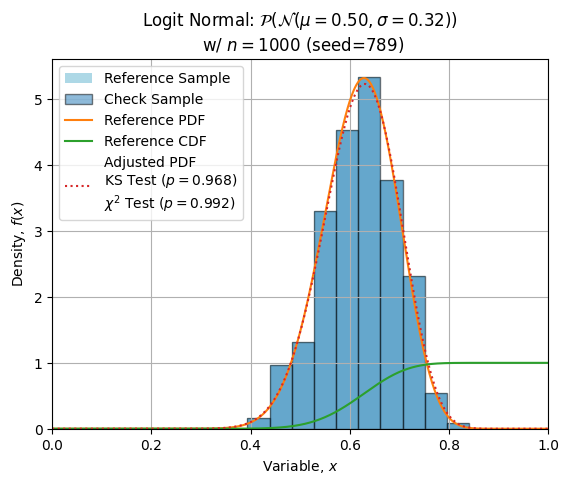

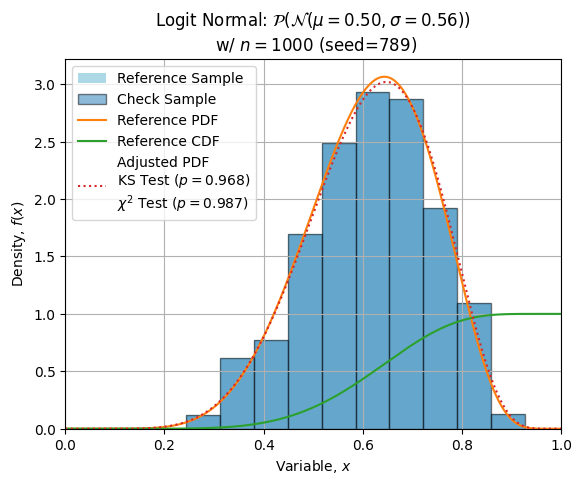

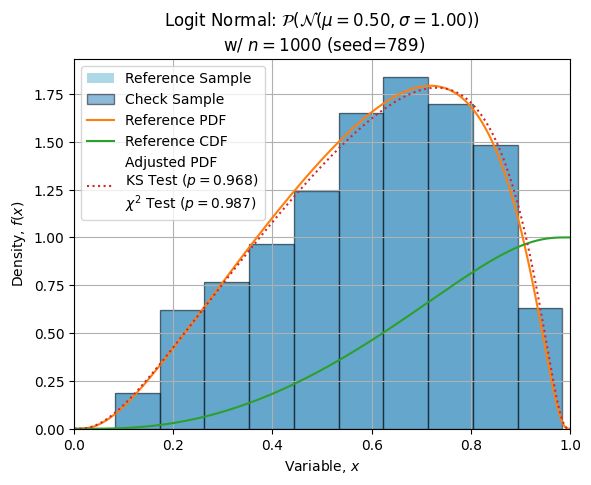

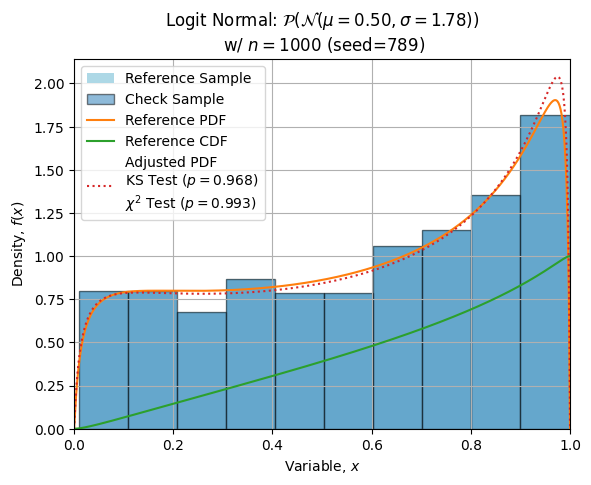

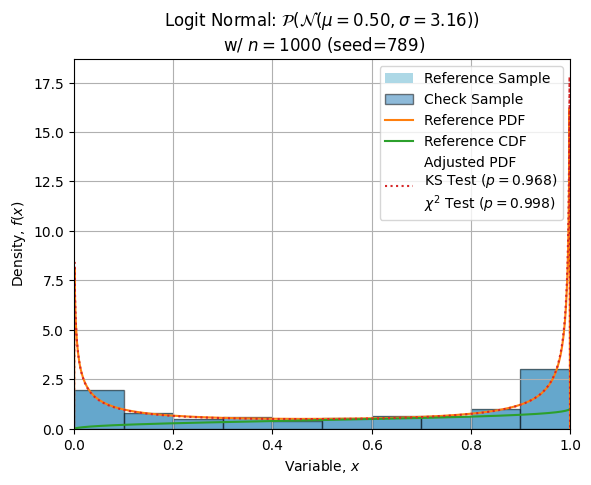

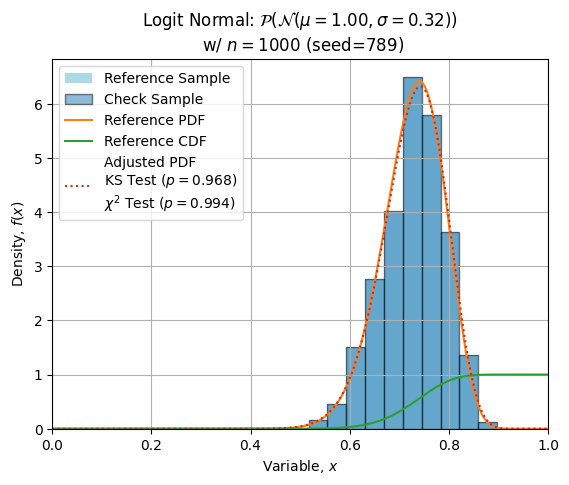

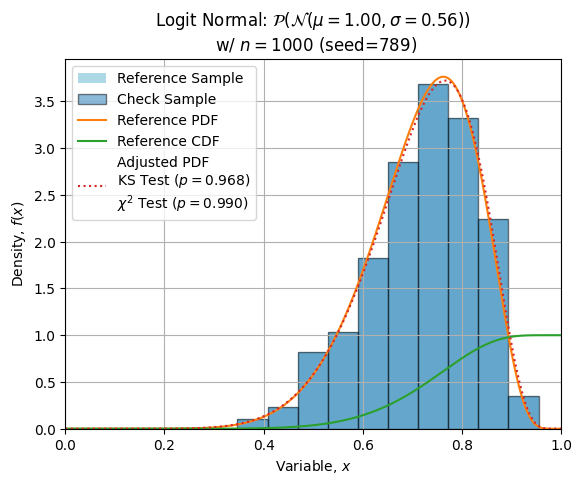

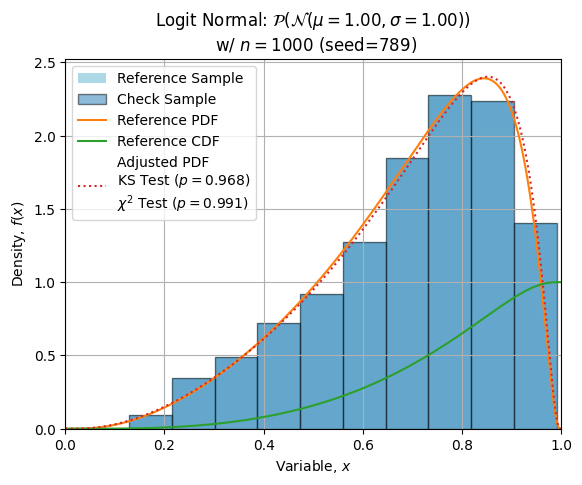

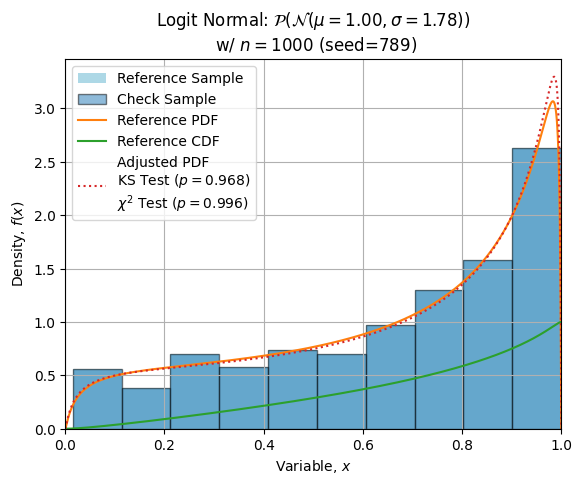

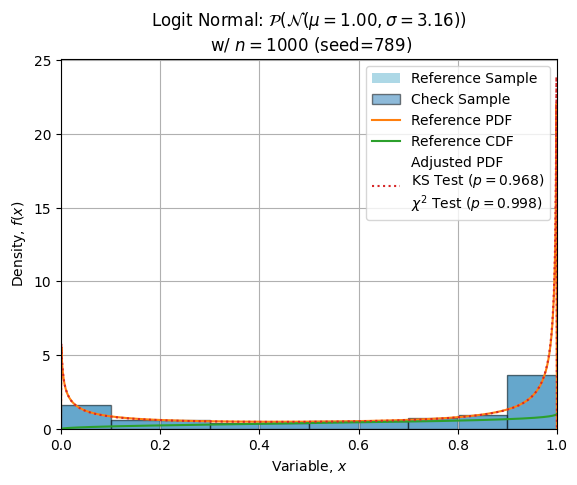

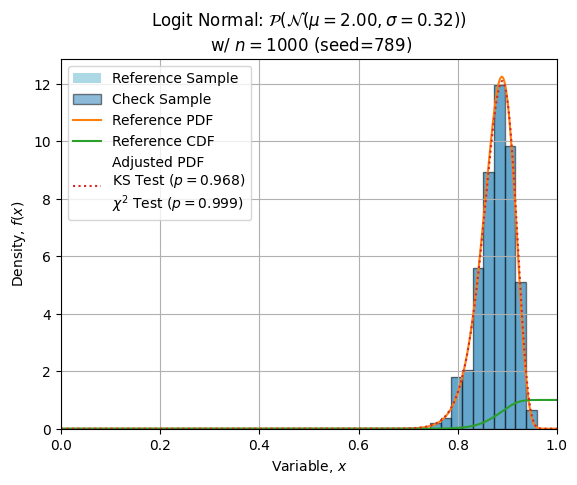

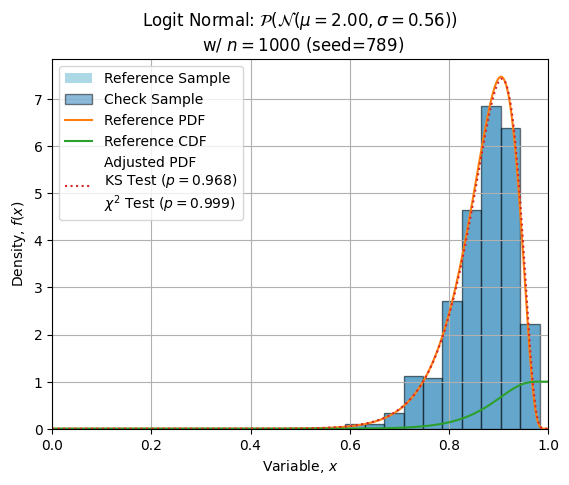

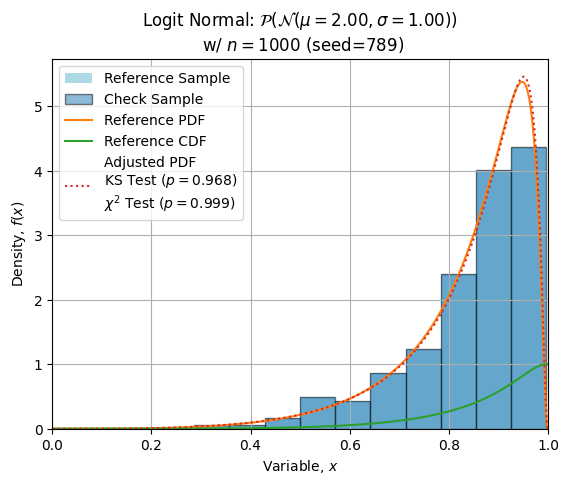

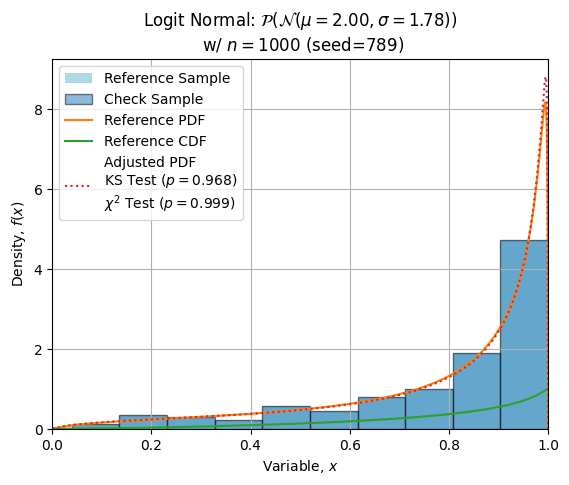

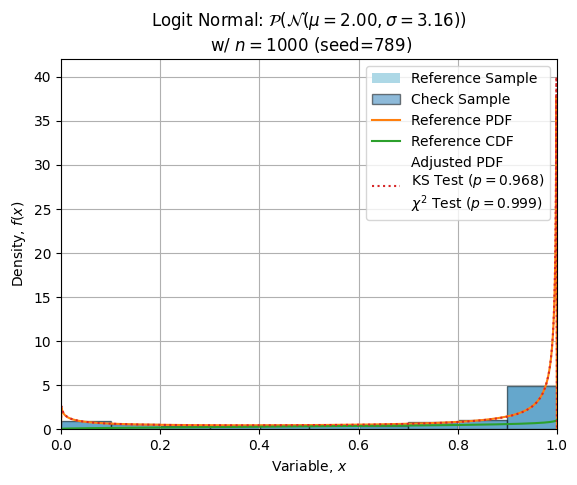

In [14]:
for fixture in generate_fixtures():
    
    # Reference:
    parameters = fixture.pop("parameters")
    normal = stats.norm(**parameters)
    sample = special.expit(normal.rvs(**fixture))
    
    # Logit Normal Law:
    law = logitnorm(m=parameters["loc"], s=parameters["scale"])
    check = law.rvs(**fixture)
    
    # Fit:
    p = logitnorm.fit(sample, floc=0.0, fscale=1.0)
    trial = logitnorm(*p)
    resample = trial.rvs(**fixture)
    
    # Hypothetis Tests:
    ks = stats.kstest(check, trial.cdf)
    bins = np.histogram(resample, bins=np.linspace(eps, 1.-eps, 10))[1]
    obs = np.diff(trial.cdf(bins)) * fixture["size"]
    ref = np.diff(law.cdf(bins)) * fixture["size"]
    chi2 = stats.chisquare(obs, ref, ddof=2)
    
    print(parameters, fixture)
    print("Same: %s" % np.allclose(sample - check, 0.0))
    print("Area: %f" % integrate.trapezoid(law.pdf(x), x=x))
    print("Fit Parameters: %s" % (p,))
    print("KS Test: %s" % (ks,))
    print("Chi2 Test: %s" % (chi2,))
    #print("Reference: %s" % ref)
    #print("Observed: %s" % obs)
    print("-"*80)
    
    # Show:
    if True:
        fig, axe = plt.subplots()
        axe.hist(sample, density=1, color="lightblue", label="Reference Sample")
        axe.hist(check, density=1, alpha=0.5, edgecolor="black", label="Check Sample")
        axe.plot(x, law.pdf(x), label="Reference PDF")
        axe.plot(x, law.cdf(x), label="Reference CDF")
        axe.plot(x, trial.pdf(x), ":", label="Adjusted PDF\nKS Test ($p = {:.3f}$)\n$\chi^2$ Test ($p = {:.3f}$)".format(ks.pvalue, chi2.pvalue))
        axe.set_title("Logit Normal: $\mathcal{{P}}(\mathcal{{N}}(\mu={loc:.2f}, \sigma={scale:.2f}))$\n w/ $n={size:}$ (seed={random_state:})".format(**fixture, **parameters))
        axe.set_xlabel("Variable, $x$")
        axe.set_ylabel("Density, $f(x)$")
        axe.set_xlim([0, 1])
        axe.legend()
        axe.grid()